In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
idf = pd.read_csv('../data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
idf = idf.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
idf.index.name = 'Date'
idf.shape
idf.head(3)
idf.tail(3)

(1563, 4)

,Open,Close,High,Low
Date,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15
2019-11-05 09:32:00,3079.43,3079.68,3080.46,3079.43


,Open,Close,High,Low
Date,,,,
2019-11-08 15:57:00,3090.73,3090.70,3091.02,3090.52
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96


In [4]:
import mplfinance as mpf

In [5]:
df = idf.loc['2019-11-06 09:30':'2019-11-06 16:00',:].copy()

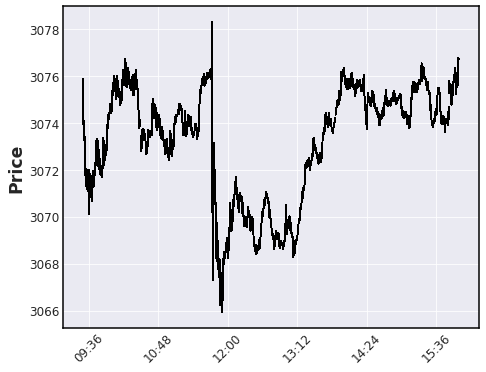

In [6]:
mpf.plot(df)

In [7]:
close = df['Close']
std = close.rolling(25).std()
mav = close.rolling(25).mean()

In [8]:
type(std)

pandas.core.series.Series

In [9]:
df['Upper'] = mav + (2*std)

In [10]:
df['Lower'] = mav - (2*std)

In [11]:
df.head()
df.tail()

,Open,Close,High,Low,Upper,Lower
Date,,,,,,
2019-11-06 09:30:00,3075.10,3074.12,3075.91,3073.90,NaN,NaN
2019-11-06 09:31:00,3074.02,3073.59,3074.12,3073.21,NaN,NaN
2019-11-06 09:32:00,3073.42,3071.78,3073.42,3071.74,NaN,NaN
2019-11-06 09:33:00,3071.76,3072.03,3072.07,3071.25,NaN,NaN
2019-11-06 09:34:00,3072.05,3071.20,3072.05,3071.12,NaN,NaN


,Open,Close,High,Low,Upper,Lower
Date,,,,,,
2019-11-06 15:56:00,3076.00,3076.22,3076.37,3075.75,3076.193602,3073.245598
2019-11-06 15:57:00,3076.15,3075.49,3076.15,3075.20,3076.249350,3073.313850
2019-11-06 15:58:00,3075.49,3075.54,3075.98,3075.49,3076.308519,3073.369881
2019-11-06 15:59:00,3075.69,3076.75,3076.79,3075.55,3076.565825,3073.326175
2019-11-06 16:00:00,3076.74,3076.73,3076.74,3076.72,3076.792462,3073.277938


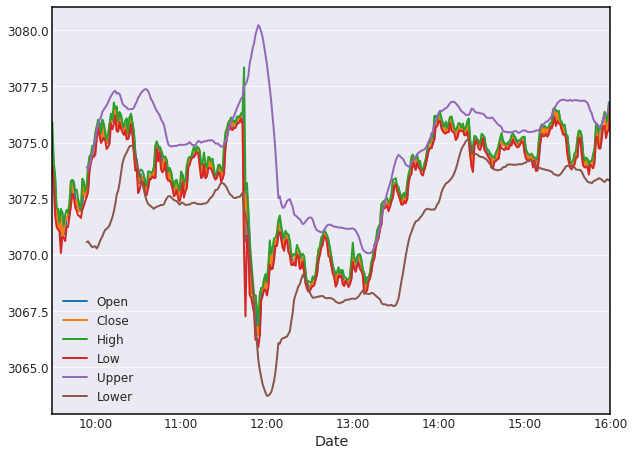

In [12]:
df.plot(figsize=(10,7.5))

In [13]:
df.head(3)
df.tail(3)

,Open,Close,High,Low,Upper,Lower
Date,,,,,,
2019-11-06 09:30:00,3075.10,3074.12,3075.91,3073.90,NaN,NaN
2019-11-06 09:31:00,3074.02,3073.59,3074.12,3073.21,NaN,NaN
2019-11-06 09:32:00,3073.42,3071.78,3073.42,3071.74,NaN,NaN


,Open,Close,High,Low,Upper,Lower
Date,,,,,,
2019-11-06 15:58:00,3075.49,3075.54,3075.98,3075.49,3076.308519,3073.369881
2019-11-06 15:59:00,3075.69,3076.75,3076.79,3075.55,3076.565825,3073.326175
2019-11-06 16:00:00,3076.74,3076.73,3076.74,3076.72,3076.792462,3073.277938


In [14]:
df.to_csv('../data/SP500_20191106_IDayBollinger.csv')

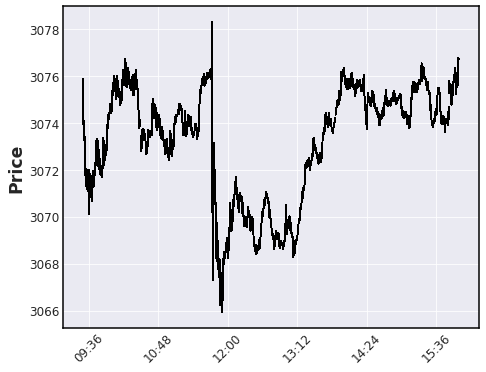

In [15]:
mpf.plot(df)

In [16]:
import matplotlib.pyplot as plt

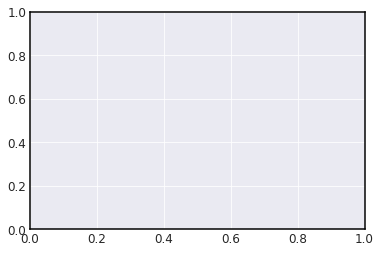

In [17]:
ax = plt.gca()

In [18]:
dftest = pd.read_csv('../data/SP500_20191106_IDayBollinger.csv',index_col=0,parse_dates=True)

In [19]:
dftest.head(3)
dftest.tail(3)

,Open,Close,High,Low,Upper,Lower
Date,,,,,,
2019-11-06 09:30:00,3075.10,3074.12,3075.91,3073.90,NaN,NaN
2019-11-06 09:31:00,3074.02,3073.59,3074.12,3073.21,NaN,NaN
2019-11-06 09:32:00,3073.42,3071.78,3073.42,3071.74,NaN,NaN


,Open,Close,High,Low,Upper,Lower
Date,,,,,,
2019-11-06 15:58:00,3075.49,3075.54,3075.98,3075.49,3076.308519,3073.369881
2019-11-06 15:59:00,3075.69,3076.75,3076.79,3075.55,3076.565825,3073.326175
2019-11-06 16:00:00,3076.74,3076.73,3076.74,3076.72,3076.792462,3073.277938


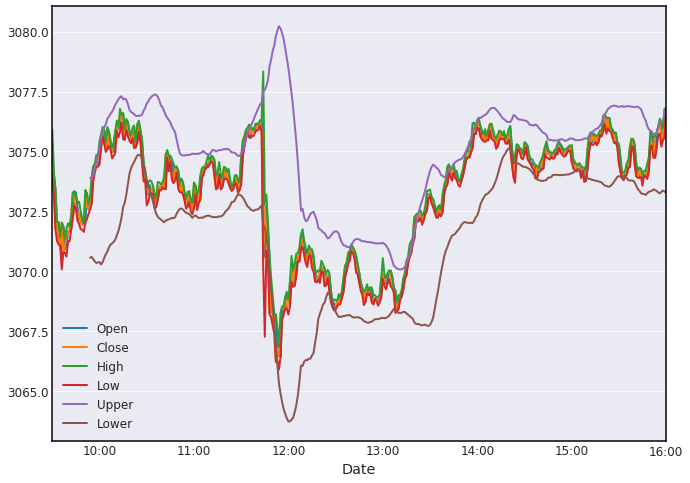

In [20]:
df.plot(figsize=(11,8))